In [1]:
import pandas as pd
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kerala = pd.read_excel(r"C:\Users\Rushikesh\Desktop\LFPR\data.xlsx")
kerala

,State_name,Sector,Sex,Age,Marital_Status,Year_Edu,LFPR
0,Kerala,1,1,66,2,20,1
1,Kerala,1,2,62,2,15,0
2,Kerala,1,2,65,3,0,0
3,Kerala,1,2,63,3,5,0
4,Kerala,1,1,36,2,10,1
...,...,...,...,...,...,...,...
15578,Kerala,2,1,87,3,0,0
15579,Kerala,2,1,43,3,7,1
15580,Kerala,2,1,16,1,10,0
15581,Kerala,2,2,14,1,9,0


In [3]:
kerala.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15583 entries, 0 to 15582
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State_name      15583 non-null  object
 1   Sector          15583 non-null  int64 
 2   Sex             15583 non-null  int64 
 3   Age             15583 non-null  int64 
 4   Marital_Status  15583 non-null  int64 
 5   Year_Edu        15583 non-null  int64 
 6   LFPR            15583 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 852.3+ KB


In [4]:
kerala.shape

(15583, 7)

In [5]:
kerala.isna().any()

State_name        False
Sector            False
Sex               False
Age               False
Marital_Status    False
Year_Edu          False
LFPR              False
dtype: bool

In [6]:
kerala['Sector'] = kerala['Sector'].replace({1:0, 2:1})
kerala['Sex'] = kerala['Sex'].replace({1:0, 2:1})
kerala['Marital_Status'] = kerala['Marital_Status'].replace({1:0, 2:1})

In [7]:
kerala = kerala.drop(kerala[kerala['Sex'] == 3].index)
kerala = kerala.drop(kerala[kerala['Marital_Status'] == 3].index)
kerala = kerala.drop(kerala[kerala['Marital_Status'] == 4].index)

In [8]:
kerala[['Age','Year_Edu']].describe()

,Age,Year_Edu
count,14028.000000,14028.000000
mean,35.337753,8.875463
std,21.279688,4.982478
min,0.000000,0.000000
25%,16.000000,5.000000
50%,35.000000,10.000000
75%,52.000000,12.000000
max,95.000000,25.000000


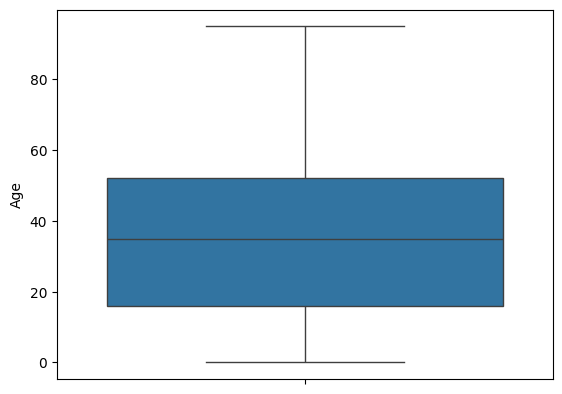

In [9]:
sns.boxplot(y='Age', data= kerala)
plt.show()

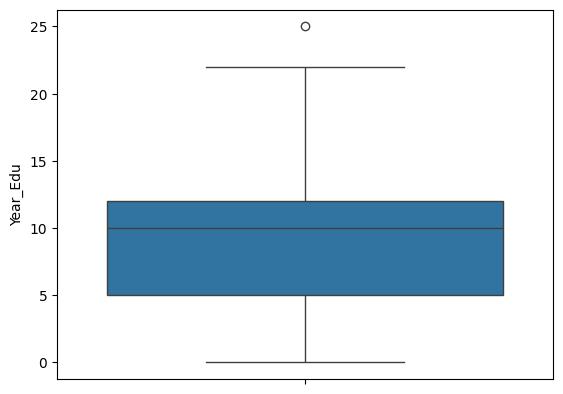

In [10]:
sns.boxplot(y='Year_Edu', data= kerala)
plt.show()

In [11]:
kerala['LFPR'].value_counts(normalize=True)

LFPR
0    0.546906
1    0.453094
Name: proportion, dtype: float64

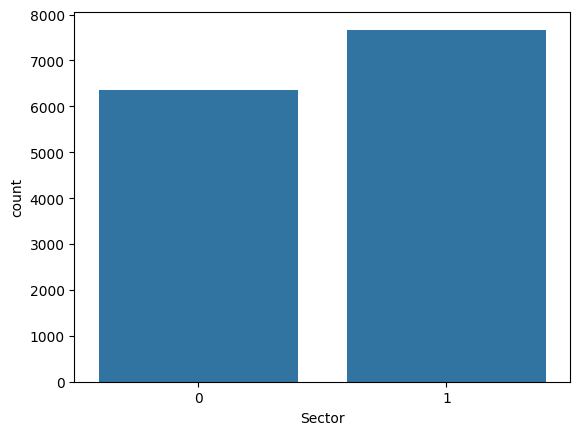

In [12]:
sns.countplot(x='Sector', data=kerala)
plt.show()

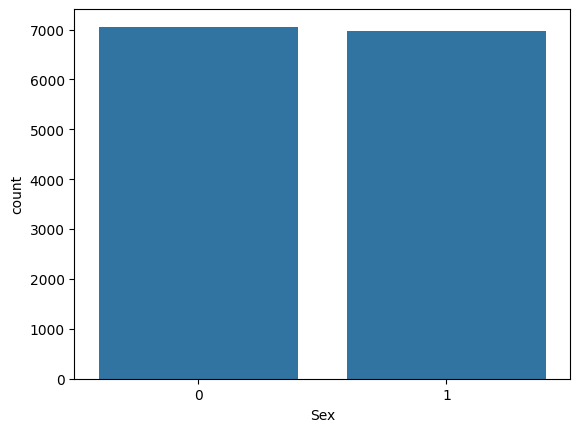

In [13]:
sns.countplot(x='Sex', data=kerala)
plt.show()

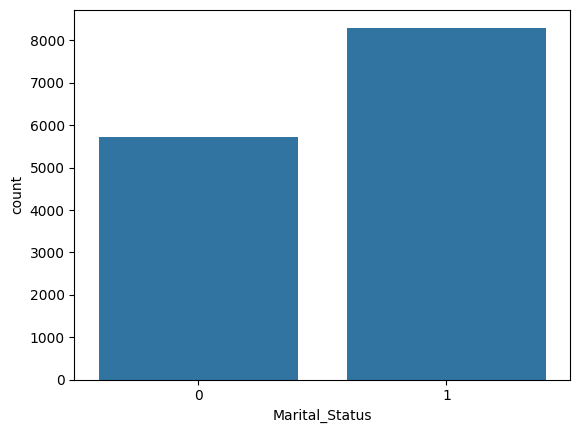

In [14]:
sns.countplot(x='Marital_Status', data=kerala)
plt.show()

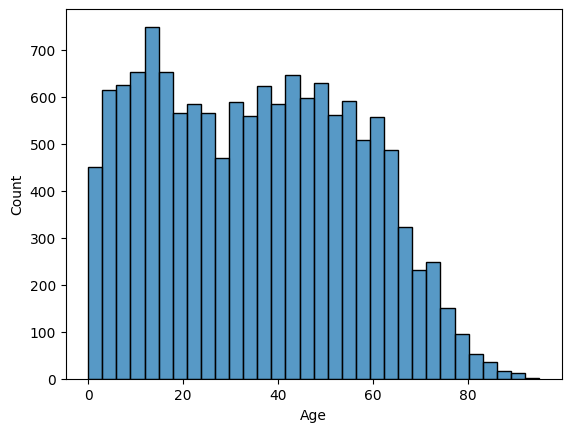

In [15]:
sns.histplot(x='Age', data = kerala)
plt.show()

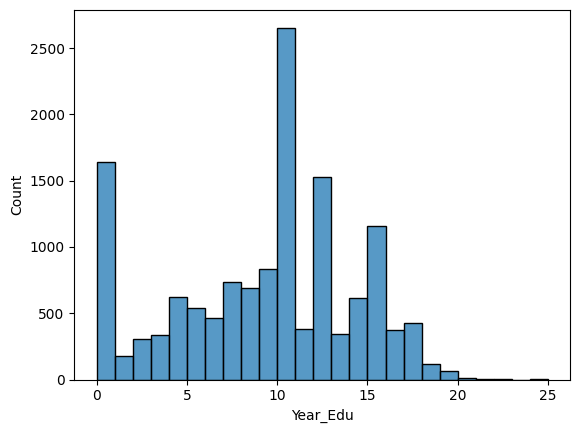

In [16]:
sns.histplot(x='Year_Edu', data = kerala, binwidth = 1)
plt.show()

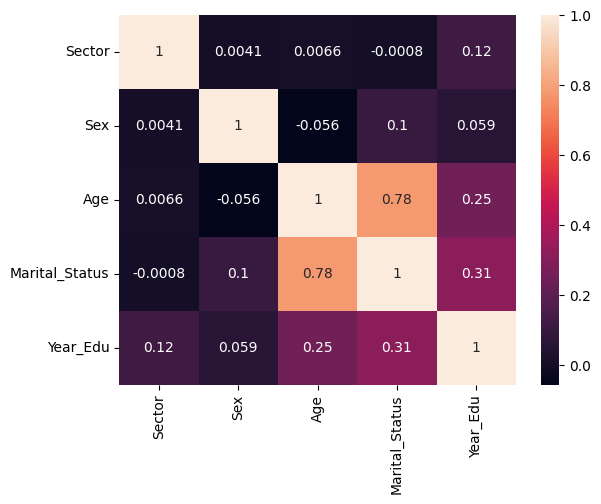

In [17]:
sns.heatmap(kerala[['Sector','Sex','Age','Marital_Status','Year_Edu']].corr(),annot=True)
plt.show()

In [18]:
male_vs_female = kerala.groupby('Sex')['LFPR'].mean()
rural_vs_urban = kerala.groupby('Sector')['LFPR'].mean()
unmarried_vs_married = kerala.groupby('Marital_Status')['LFPR'].mean()
print(male_vs_female)
print(rural_vs_urban)
print(unmarried_vs_married)

Sex
0    0.583050
1    0.321572
Name: LFPR, dtype: float64
Sector
0    0.458405
1    0.448690
Name: LFPR, dtype: float64
Marital_Status
0    0.208071
1    0.621989
Name: LFPR, dtype: float64


In [19]:
interxn = pd.crosstab(kerala['Sex'],kerala['Sector'],values=kerala['LFPR'],aggfunc='mean')
interxn

Sector,0,1
Sex,,
0,0.580143,0.585480
1,0.334075,0.311291


In [20]:
model = logit('LFPR ~ Sector + Sex + Age + Marital_Status + Year_Edu', data = kerala).fit()
print(model.params)

Optimization terminated successfully.
         Current function value: 0.486162
         Iterations 7
Intercept        -2.482914
Sector           -0.291629
Sex              -1.907947
Age               0.012710
Marital_Status    1.759073
Year_Edu          0.189024
dtype: float64


In [21]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                   LFPR   No. Observations:                14028
Model:                          Logit   Df Residuals:                    14022
Method:                           MLE   Df Model:                            5
Date:                Sun, 31 Aug 2025   Pseudo R-squ.:                  0.2941
Time:                        13:18:55   Log-Likelihood:                -6819.9
converged:                       True   LL-Null:                       -9661.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.4829      0.078    -32.020      0.000      -2.635      -2.331
Sector            -0.2916      0.043     -6.822      0.000      -0.375      -0.208
Sex               -1.9079      0.049

In [22]:
model2 = logit('LFPR ~ Sector + Sex * Year_Edu + Age + Marital_Status', data = kerala).fit()
print(model2.params)

Optimization terminated successfully.
         Current function value: 0.483310
         Iterations 7
Intercept        -2.840198
Sector           -0.283605
Sex              -1.003320
Year_Edu          0.233169
Sex:Year_Edu     -0.095416
Age               0.009450
Marital_Status    1.928549
dtype: float64


In [25]:
kerala.reset_index(drop=True, inplace=True)
kerala

,State_name,Sector,Sex,Age,Marital_Status,Year_Edu,LFPR
0,Kerala,0,0,66,1,20,1
1,Kerala,0,1,62,1,15,0
2,Kerala,0,0,36,1,10,1
3,Kerala,0,1,33,1,12,0
4,Kerala,0,0,1,0,0,0
...,...,...,...,...,...,...,...
14023,Kerala,1,1,71,1,15,1
14024,Kerala,1,0,40,0,10,1
14025,Kerala,1,0,16,0,10,0
14026,Kerala,1,1,14,0,9,0


In [26]:
kerala.to_csv(r'C:\Users\Rushikesh\Desktop\LFPR\kerala.csv')